# Melboune Housing Prices Prediction


In [2]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#load data
df = pd.read_csv("melbourne_housing.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# EDA

In [4]:
df.shape

(34857, 21)

In [5]:
df.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.465238,0.271511,0.085890,0.946755,0.611826,0.393878,0.037402,0.156229,-0.012749,0.004872,0.103235,-0.071677
Price,0.465238,1.000000,-0.211384,0.044950,0.430275,0.429878,0.201803,0.032748,0.100754,-0.333306,-0.215607,0.197874,-0.059017
Distance,0.271511,-0.211384,1.000000,0.481566,0.269524,0.126201,0.241835,0.060862,0.076301,0.323059,-0.100417,0.200946,-0.018140
Postcode,0.085890,0.044950,0.481566,1.000000,0.089292,0.120080,0.067886,0.040664,0.042437,0.089805,-0.231027,0.362895,0.017108
Bedroom2,0.946755,0.430275,0.269524,0.089292,1.000000,0.614892,0.388491,0.037019,0.154157,-0.002022,0.003447,0.106164,-0.053451
Bathroom,0.611826,0.429878,0.126201,0.120080,0.614892,1.000000,0.307518,0.036333,0.147558,0.167955,-0.059183,0.106531,-0.032887
Car,0.393878,0.201803,0.241835,0.067886,0.388491,0.307518,1.000000,0.037829,0.104373,0.128702,-0.009020,0.047213,-0.009617
Landsize,0.037402,0.032748,0.060862,0.040664,0.037019,0.036333,0.037829,1.000000,0.354530,0.044474,0.025318,-0.002582,-0.018195
BuildingArea,0.156229,0.100754,0.076301,0.042437,0.154157,0.147558,0.104373,0.354530,1.000000,0.067811,0.017155,-0.002143,-0.024523
YearBuilt,-0.012749,-0.333306,0.323059,0.089805,-0.002022,0.167955,0.128702,0.044474,0.067811,1.000000,0.091592,-0.022175,0.022420


<AxesSubplot:>

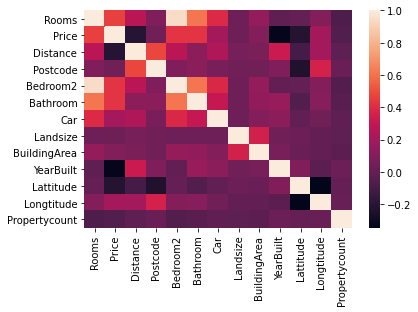

In [6]:
sns.heatmap(df.corr())

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

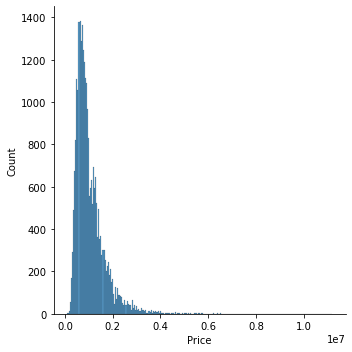

In [8]:
sns.displot(df['Price'])

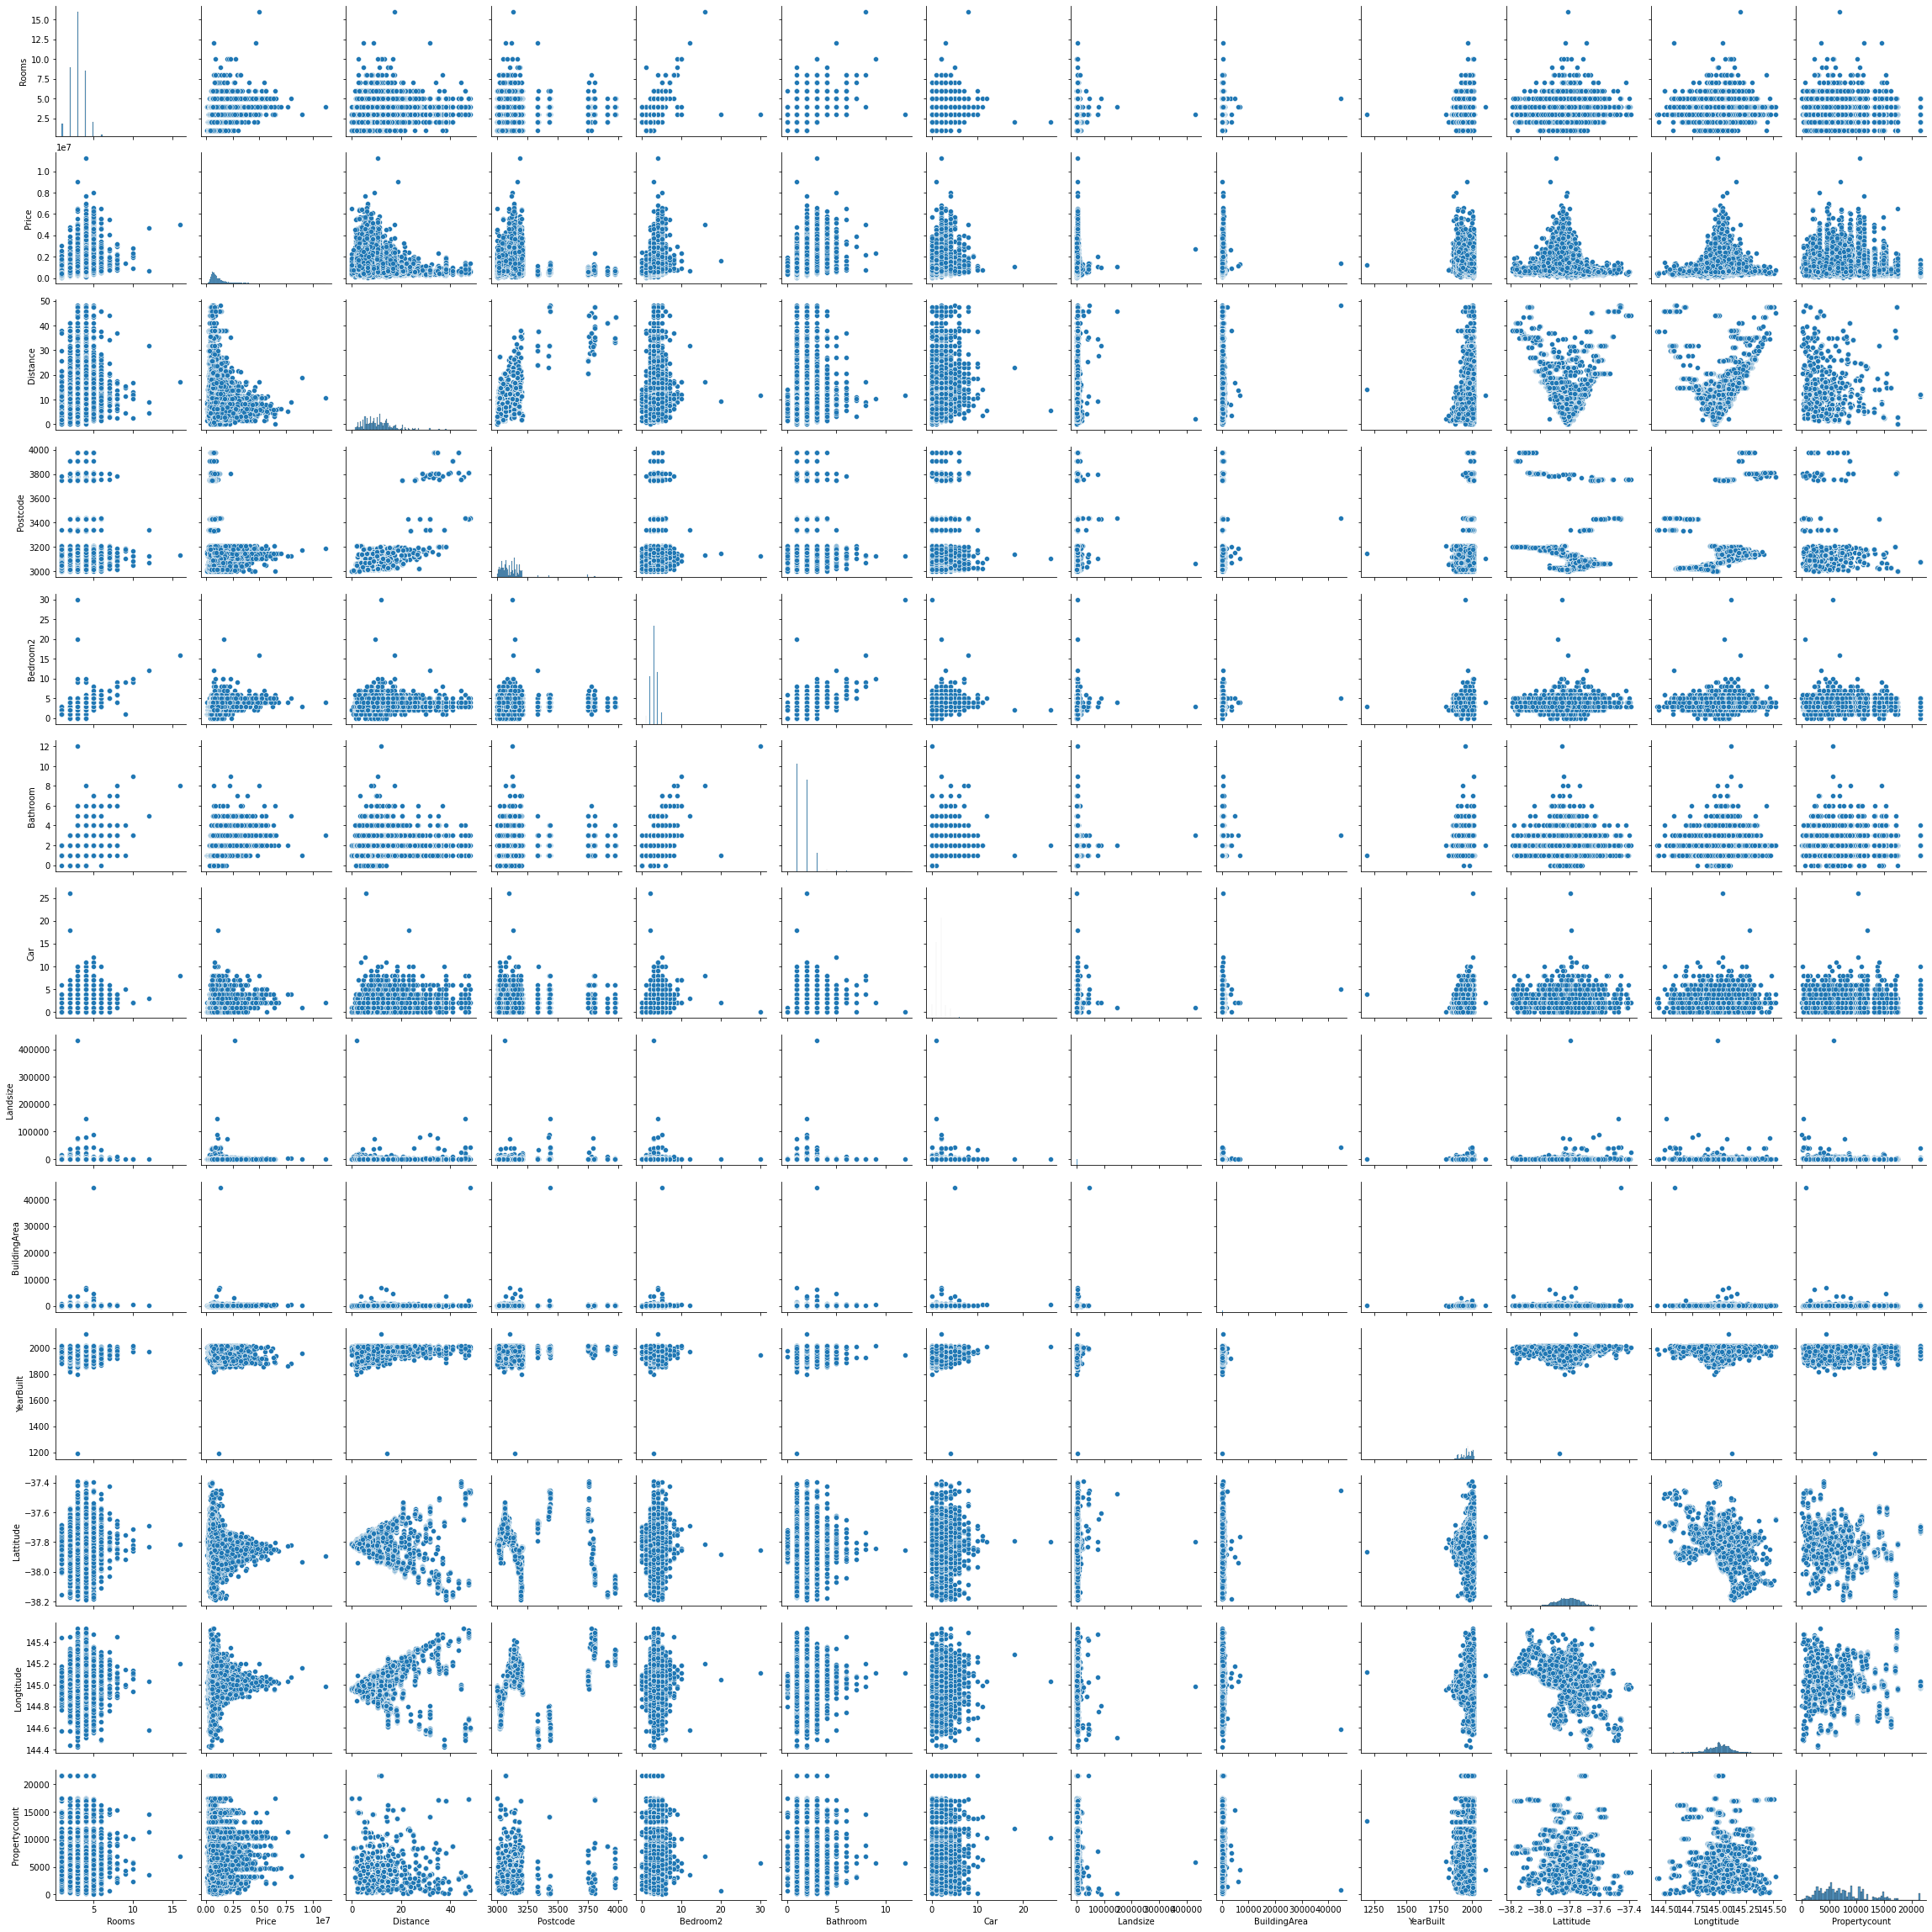

In [19]:
sns.pairplot(df)

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

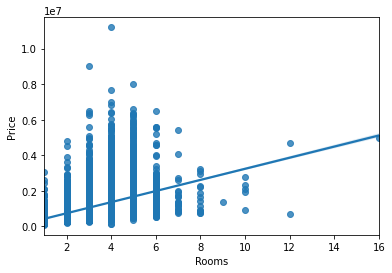

In [10]:
#lets see how price varies with rooms
sns.regplot(x = df['Rooms'],y = df['Price'])

# data preprocessing: handling categorical columns,handling null values ,feature scaling

In [11]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [17]:
df['Address'].nunique()

34009

In [18]:
df['Suburb'].nunique()

351

In [19]:
df['Type'].nunique()

3

In [20]:
df['Method'].nunique()

9

In [21]:
df['SellerG'].nunique()

388

In [29]:
df['Postcode'] = df['Postcode'].fillna(df['Postcode'].mean())

In [26]:
df['Distance'] = df['Distance'].fillna(df['Distance'].mean())

In [32]:
df['Bedroom2'] = df['Bedroom2'].fillna(df['Bedroom2'].mean())

In [34]:
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].mean())

In [37]:
df['Car'] = df['Car'].fillna(df['Car'].mean())

In [39]:
df['Landsize'] = df['Landsize'].fillna(df['Landsize'].mean())

In [42]:
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].mean())

In [46]:
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].mode()[0])

In [50]:
df['CouncilArea'] = df['CouncilArea'].fillna(df['CouncilArea'].mode()[0])

In [51]:
df['Lattitude'] = df['Lattitude'].fillna(df['Lattitude'].mean())

In [52]:
df['Longtitude'] = df['Longtitude'].fillna(df['Longtitude'].mean())

In [53]:
df['Regionname'] = df['Regionname'].fillna(df['Regionname'].mode()[0])

In [55]:
df['Propertycount'] = df['Propertycount'].fillna(df['Propertycount'].mean())

In [58]:
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [59]:
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [110]:
#select input features 
X = df.iloc[:,[2,3,5,7,8,10,11,12,13,14,15,16,20]]

#output/label
y = df.iloc[:,4]

In [111]:
X

,Rooms,Type,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Propertycount
0,2,h,SS,3/09/2016,2.5,2.000000,1.000000,1.000000,126.000000,160.2564,1970.0,Yarra City Council,4019.0
1,2,h,S,3/12/2016,2.5,2.000000,1.000000,1.000000,202.000000,160.2564,1970.0,Yarra City Council,4019.0
2,2,h,S,4/02/2016,2.5,2.000000,1.000000,0.000000,156.000000,79.0000,1900.0,Yarra City Council,4019.0
3,3,u,VB,4/02/2016,2.5,3.000000,2.000000,1.000000,0.000000,160.2564,1970.0,Yarra City Council,4019.0
4,3,h,SP,4/03/2017,2.5,3.000000,2.000000,0.000000,134.000000,150.0000,1900.0,Yarra City Council,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,h,PI,24/02/2018,6.3,4.000000,1.000000,3.000000,593.000000,160.2564,1970.0,Maribyrnong City Council,6543.0
34853,2,h,SP,24/02/2018,6.3,2.000000,2.000000,1.000000,98.000000,104.0000,2018.0,Maribyrnong City Council,6543.0
34854,2,t,S,24/02/2018,6.3,2.000000,1.000000,2.000000,220.000000,120.0000,2000.0,Maribyrnong City Council,6543.0
34855,3,h,SP,24/02/2018,6.3,3.084647,1.624798,1.728845,593.598993,160.2564,1970.0,Maribyrnong City Council,6543.0


In [112]:
int(df['Date'][0].split('/')[2])

2016

In [113]:
#lets make a new feature years_old from YearBuilt and Date
n = len(X['Date'])
X['years_old'] = np.zeros(n)
for i in range(n):
    X['years_old'][i] = int(X['Date'][i].split('/')[2]) - X['YearBuilt'][i]
    if X['years_old'][i] < 0:
        X['years_old'][i] = 0

<ipython-input-113-2b4c0718b2de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['years_old'] = np.zeros(n)
<ipython-input-113-2b4c0718b2de>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['years_old'][i] = int(X['Date'][i].split('/')[2]) - X['YearBuilt'][i]
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [114]:
X

,Rooms,Type,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Propertycount,years_old
0,2,h,SS,3/09/2016,2.5,2.000000,1.000000,1.000000,126.000000,160.2564,1970.0,Yarra City Council,4019.0,46.0
1,2,h,S,3/12/2016,2.5,2.000000,1.000000,1.000000,202.000000,160.2564,1970.0,Yarra City Council,4019.0,46.0
2,2,h,S,4/02/2016,2.5,2.000000,1.000000,0.000000,156.000000,79.0000,1900.0,Yarra City Council,4019.0,116.0
3,3,u,VB,4/02/2016,2.5,3.000000,2.000000,1.000000,0.000000,160.2564,1970.0,Yarra City Council,4019.0,46.0
4,3,h,SP,4/03/2017,2.5,3.000000,2.000000,0.000000,134.000000,150.0000,1900.0,Yarra City Council,4019.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,h,PI,24/02/2018,6.3,4.000000,1.000000,3.000000,593.000000,160.2564,1970.0,Maribyrnong City Council,6543.0,48.0
34853,2,h,SP,24/02/2018,6.3,2.000000,2.000000,1.000000,98.000000,104.0000,2018.0,Maribyrnong City Council,6543.0,0.0
34854,2,t,S,24/02/2018,6.3,2.000000,1.000000,2.000000,220.000000,120.0000,2000.0,Maribyrnong City Council,6543.0,18.0
34855,3,h,SP,24/02/2018,6.3,3.084647,1.624798,1.728845,593.598993,160.2564,1970.0,Maribyrnong City Council,6543.0,48.0


In [115]:
X.drop(['Date','YearBuilt'], axis = 1,inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [116]:
X

,Rooms,Type,Method,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Propertycount,years_old
0,2,h,SS,2.5,2.000000,1.000000,1.000000,126.000000,160.2564,Yarra City Council,4019.0,46.0
1,2,h,S,2.5,2.000000,1.000000,1.000000,202.000000,160.2564,Yarra City Council,4019.0,46.0
2,2,h,S,2.5,2.000000,1.000000,0.000000,156.000000,79.0000,Yarra City Council,4019.0,116.0
3,3,u,VB,2.5,3.000000,2.000000,1.000000,0.000000,160.2564,Yarra City Council,4019.0,46.0
4,3,h,SP,2.5,3.000000,2.000000,0.000000,134.000000,150.0000,Yarra City Council,4019.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,h,PI,6.3,4.000000,1.000000,3.000000,593.000000,160.2564,Maribyrnong City Council,6543.0,48.0
34853,2,h,SP,6.3,2.000000,2.000000,1.000000,98.000000,104.0000,Maribyrnong City Council,6543.0,0.0
34854,2,t,S,6.3,2.000000,1.000000,2.000000,220.000000,120.0000,Maribyrnong City Council,6543.0,18.0
34855,3,h,SP,6.3,3.084647,1.624798,1.728845,593.598993,160.2564,Maribyrnong City Council,6543.0,48.0


In [117]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          34857 non-null  int64  
 1   Type           34857 non-null  object 
 2   Method         34857 non-null  object 
 3   Distance       34857 non-null  float64
 4   Bedroom2       34857 non-null  float64
 5   Bathroom       34857 non-null  float64
 6   Car            34857 non-null  float64
 7   Landsize       34857 non-null  float64
 8   BuildingArea   34857 non-null  float64
 9   CouncilArea    34857 non-null  object 
 10  Propertycount  34857 non-null  float64
 11  years_old      34857 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 3.2+ MB


In [118]:
X['Type'].dtype == 'O'

True

In [119]:
#lets extract categorical columns
cat_cols = []
for col in X.columns:
    if X[col].dtype == 'O':
        cat_cols.append(col)
cat_cols

['Type', 'Method', 'CouncilArea']

In [120]:
#lets do onehot encoding for categorical cols
from sklearn.preprocessing import OneHotEncoder
X = pd.get_dummies(X,columns = cat_cols,drop_first = True)
X

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,years_old,Type_t,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,2,2.5,2.000000,1.000000,1.000000,126.000000,160.2564,4019.0,46.0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,2.5,2.000000,1.000000,1.000000,202.000000,160.2564,4019.0,46.0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,2.5,2.000000,1.000000,0.000000,156.000000,79.0000,4019.0,116.0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,2.5,3.000000,2.000000,1.000000,0.000000,160.2564,4019.0,46.0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,2.5,3.000000,2.000000,0.000000,134.000000,150.0000,4019.0,117.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,6.3,4.000000,1.000000,3.000000,593.000000,160.2564,6543.0,48.0,0,...,0,0,0,0,0,0,0,0,0,0
34853,2,6.3,2.000000,2.000000,1.000000,98.000000,104.0000,6543.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
34854,2,6.3,2.000000,1.000000,2.000000,220.000000,120.0000,6543.0,18.0,1,...,0,0,0,0,0,0,0,0,0,0
34855,3,6.3,3.084647,1.624798,1.728845,593.598993,160.2564,6543.0,48.0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
columns = X.columns

In [123]:
#lets do scaling of data
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X = scaling.fit_transform(X)
X = pd.DataFrame(X,columns = columns)
X

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,years_old,Type_t,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,-1.062988,-1.279322,-1.265153e+00,-9.870370e-01,-8.328650e-01,-1.691959e-01,1.129644e-17,-0.802624,-0.117798,-0.338321,...,-0.014173,-0.254605,-0.050309,-0.195247,-0.209085,-0.134349,-0.155988,-0.135011,5.328263,-0.054174
1,-1.062988,-1.279322,-1.265153e+00,-9.870370e-01,-8.328650e-01,-1.416961e-01,1.129644e-17,-0.802624,-0.117798,-0.338321,...,-0.014173,-0.254605,-0.050309,-0.195247,-0.209085,-0.134349,-0.155988,-0.135011,5.328263,-0.054174
2,-1.062988,-1.279322,-1.265153e+00,-9.870370e-01,-1.975583e+00,-1.583407e-01,-3.225224e-01,-0.802624,2.682962,-0.338321,...,-0.014173,-0.254605,-0.050309,-0.195247,-0.209085,-0.134349,-0.155988,-0.135011,5.328263,-0.054174
3,-0.031974,-1.279322,-9.873400e-02,5.927324e-01,-8.328650e-01,-2.147877e-01,1.129644e-17,-0.802624,-0.117798,-0.338321,...,-0.014173,-0.254605,-0.050309,-0.195247,-0.209085,-0.134349,-0.155988,-0.135011,5.328263,-0.054174
4,-0.031974,-1.279322,-9.873400e-02,5.927324e-01,-1.975583e+00,-1.663012e-01,-4.070964e-02,-0.802624,2.722972,-0.338321,...,-0.014173,-0.254605,-0.050309,-0.195247,-0.209085,-0.134349,-0.155988,-0.135011,5.328263,-0.054174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,0.999040,-0.719568,1.067685e+00,-9.870370e-01,1.452572e+00,-2.167396e-04,1.129644e-17,-0.232594,-0.037776,-0.338321,...,-0.014173,-0.254605,-0.050309,-0.195247,-0.209085,-0.134349,-0.155988,-0.135011,-0.187678,-0.054174
34853,-1.062988,-0.719568,-1.265153e+00,5.927324e-01,-8.328650e-01,-1.793274e-01,-2.232926e-01,-0.232594,-1.958297,-0.338321,...,-0.014173,-0.254605,-0.050309,-0.195247,-0.209085,-0.134349,-0.155988,-0.135011,-0.187678,-0.054174
34854,-1.062988,-0.719568,-1.265153e+00,-9.870370e-01,3.098534e-01,-1.351830e-01,-1.597855e-01,-0.232594,-1.238101,2.955773,...,-0.014173,-0.254605,-0.050309,-0.195247,-0.209085,-0.134349,-0.155988,-0.135011,-0.187678,-0.054174
34855,-0.031974,-0.719568,9.132259e-17,1.208420e-16,4.173560e-17,1.237085e-17,1.129644e-17,-0.232594,-0.037776,-0.338321,...,-0.014173,-0.254605,-0.050309,-0.195247,-0.209085,-0.134349,-0.155988,-0.135011,-0.187678,-0.054174


# train test split

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 49)

In [131]:
X_train.shape

(27885, 51)

In [132]:
y_train.shape

(27885,)

# apply ml models 

In [133]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train,y_train)
l_pred = l_reg.predict(X_test)

In [142]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,l_pred)

272121.1262198773

In [137]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train,y_train)
rf_pred = rf_reg.predict(X_test)

In [143]:
mean_absolute_error(y_test,rf_pred)

232755.91433384587

# compare accuracy of different models
Out of Two models RandomForest seems better choice

In [145]:
# lets do gridsearchcv for random forest

n_estimators = [200, 600, 100, 120]
max_features = [0.2, 0.6, 1.0]
max_depth = [20,8,None]
bootstrap = [True, False]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
max_samples = [0.5, 0.75, 1.0]

param_grid ={'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'max_samples': max_samples,
            'bootstrap': bootstrap,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf}

In [146]:
from sklearn.model_selection import GridSearchCV

In [147]:
grid_rf = GridSearchCV(estimator = rf_reg,
                            param_grid = param_grid,
                            cv = 5,
                            verbose = 2,
                            n_jobs = -1)

In [148]:
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2160 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sk

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [20, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 600, 100, 120]},
             verbose=2)

In [149]:
grid_rf.best_score_

0.5492853009349876

In [151]:
grid_rf.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 0.2,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [153]:
rf_optimized = RandomForestRegressor(n_estimators = 200,
                                    max_depth = None,
                                    bootstrap = True,
                                    max_features = 0.2,
                                    max_samples = 1.0,
                                    min_samples_leaf = 2,
                                    min_samples_split = 5)
rf_optimized.fit(X_train,y_train)

pred = rf_optimized.predict(X_test)
    


In [154]:
mean_absolute_error(y_test,pred)

227974.8752312464